In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

## Kitfox example

#### Read in data

In [2]:
df = pd.read_excel('../data/MasterDF_Kern.xlsx', sheet_name='data')
df.head()

,FID,Area,Crop,CropX,FieldCropPrice,SavedWater,Recharge,Kitfox,KitfoxAcres,TiptonKRat,GiantGarterSnake,GGSAcres,TNC,HabCorridors,ConservationAreas,ImpBirdAreas,Nitrate,ModSAGBI,Prox2Wetlands,Depth2GroundWater
0,45,70.791382,AlfalfaandAlfalfaMixtures,alfalfa-pasture,78836.822442,359.620220,12283.604016,100.0,70.791382,100.0,0.0,0.000000,94.0,0.0,100.0,0.0,0.000000,42.0,0.0,20.0
1,72,81.343317,AlfalfaandAlfalfaMixtures,alfalfa-pasture,90587.985155,413.224051,1975.754272,100.0,81.343317,100.0,100.0,81.343317,0.0,0.0,100.0,0.0,100.000000,0.0,100.0,5.0
2,91,28.286742,AlfalfaandAlfalfaMixtures,alfalfa-pasture,31501.529705,143.696647,3311.302980,100.0,28.286742,100.0,0.0,0.000000,0.0,0.0,46.0,91.0,93.333333,98.0,0.0,20.0
3,116,6.073612,AlfalfaandAlfalfaMixtures,alfalfa-pasture,6763.878538,30.853951,417.364790,100.0,6.073612,100.0,0.0,0.000000,0.0,0.0,100.0,0.0,83.333333,75.5,0.0,11.5
4,143,97.932855,AlfalfaandAlfalfaMixtures,alfalfa-pasture,109062.924182,497.498904,11437.290065,100.0,97.932855,100.0,4.0,3.917314,0.0,83.0,100.0,0.0,0.000000,97.0,100.0,20.0


In [3]:
targets = pd.read_csv('../data/targets.csv', index_col='region', thousands=',')
targets

,alfalfa-pasture,corn,field-crops-grains,veg-fruits,trees-vines
region,,,,,
NW,21320.0,8400.0,85920.0,3880.0,3880.0
NE,56850.0,7750.0,23580.0,2260.0,16800.0
SW,36820.0,3880.0,72350.0,8400.0,7750.0
SE,38760.0,16150.0,124030.0,650.0,9690.0
KR,88500.0,54910.0,42640.0,3230.0,11630.0


In [4]:
targets_kr = targets.loc['KR']

#### Fallow fields

In [5]:
# set up value stores for each ecosystem service for each bootstrap repetition

# for 1000 tries:
#    set up master df (shape = 0 x number of columns of df)
#    for crop in crop type:
#        subset dataset, get target, check that sufficient area is available
#        randomly sort the df
#        subset to meet target
#        append to master df
#    calculate ecosystem services accumulated in master df
#    append ecosystem services to value stores 
crop_types = targets.columns
kitfox = []
ggs = []
for i in range(100):
    df_fallow = pd.DataFrame(columns=df.columns)
    # Fallow fields
    for crop in crop_types:
        df_sub = df[df['CropX'] == crop]
        target = targets_kr[crop]
        df_sub_shuffle = df_sub.sample(n=df_sub.shape[0])
        df_sub_fallow = df_sub_shuffle[df_sub_shuffle['Area'].cumsum() < target]
        df_fallow = df_fallow.append(df_sub_fallow, ignore_index=True)
    # Calculate ecosystem services benefits
    kitfox.append(df_fallow['KitfoxAcres'].sum())
    ggs.append(df_fallow['GGSAcres'].sum())

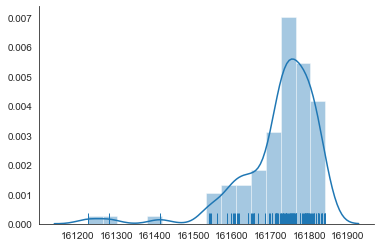

In [6]:
sns.distplot(kitfox, rug=True)
sns.despine()

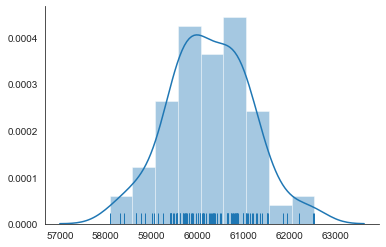

In [7]:
sns.distplot(ggs, rug=True)
sns.despine()

### Exploration

In [8]:
#Subset df by crop type
crop_type = 'alfalfa-pasture'

df_alfalfa = df[df['CropX'] == crop_type]

#Specify the target
target = targets_kr[crop_type]

# Check that sufficient area is available to meet target
print("{}, crop area is equal to {:,.2f} and target is {:,.2f}".format(df_alfalfa.Area.sum() > target, df_alfalfa.Area.sum(), target))

False, crop area is equal to 80,767.86 and target is 88,500.00


In [9]:
#Randomly sort the data
df_alfalfa_random = df_alfalfa.sample(n=df_alfalfa.shape[0])

#Select fields until target is reached.
df_alfalfa_fallow = df_alfalfa_random[df_alfalfa_random['Area'].cumsum() < target]

#Check that target is met
df_alfalfa_fallow.Area.sum()

80767.85699677002

In [10]:
df_alfalfa_fallow.head()

,FID,Area,Crop,CropX,FieldCropPrice,SavedWater,Recharge,Kitfox,KitfoxAcres,TiptonKRat,GiantGarterSnake,GGSAcres,TNC,HabCorridors,ConservationAreas,ImpBirdAreas,Nitrate,ModSAGBI,Prox2Wetlands,Depth2GroundWater
388,6167,73.583013,AlfalfaandAlfalfaMixtures,alfalfa-pasture,81945.721915,373.801704,5193.151323,100.0,73.583013,100.0,0.0,0.000000,0.0,0.0,18.666667,0.0,97.777778,17.333333,39.333333,10.0
446,7056,60.724463,AlfalfaandAlfalfaMixtures,alfalfa-pasture,67625.798610,308.480274,6259.313794,100.0,60.724463,100.0,0.0,0.000000,0.0,0.0,0.000000,0.0,71.111111,0.000000,0.000000,20.0
47,761,45.041234,AlfalfaandAlfalfaMixtures,alfalfa-pasture,50160.170745,228.809471,5207.508907,100.0,45.041234,100.0,0.0,0.000000,0.0,0.0,0.000000,0.0,86.666667,95.000000,0.000000,20.0
362,5664,13.695583,AlfalfaandAlfalfaMixtures,alfalfa-pasture,15252.085863,69.573561,332.653097,100.0,13.695583,100.0,100.0,13.695583,0.0,100.0,100.000000,100.0,86.666667,0.000000,100.000000,10.0
1067,15912,63.793587,AlfalfaandAlfalfaMixtures,alfalfa-pasture,71043.728207,324.071422,5502.933085,100.0,63.793587,100.0,0.0,0.000000,0.0,0.0,0.000000,0.0,81.111111,35.000000,0.000000,20.0


In [11]:
#Sum the ecosystem services gained
kitfox = df_alfalfa_fallow.KitfoxAcres.sum()
kitfox

80621.07102097

In [12]:
#